In [2]:
import matplotlib.pyplot as plt
import numpy as np
import codemodule as cm
from scipy.integrate import trapz 

In [20]:
plt.rcParams['figure.figsize'] = [20, 5]

In [3]:
r_c = 4.5
frames = cm.read_lammpstrj('./coms/MIXTURE_N1-256_N2-256_MPR1-50_MPR2-50_Bend1-00.0_Bend2-30.0_L-046.78-com.lammpstrj',0.2)
adj_mat = cm.dyn_graph_ser(frames,r_c)

6001 frames with 0.2 discard and 1 stride gives back 4801 frames


In [10]:
part_inds=[100,450]
binsies = np.arange(-20,21)
lags = [1,5,10,20]
s = 4
res_tot= np.zeros((len(lags),len(binsies[:-1]),len(part_inds)))

In [11]:
for partind,k in enumerate(part_inds):
    times,res,comps = cm.part_clustser(adj_mat,k)
    N = len(comps)
    print(partind)
    for lind,lag in enumerate(lags):
        to_hist = []
        #sampled_inds = []
        norm = 0
        for i in range(0,N-lag,lag):
            #ind = np.random.randint(0,N-lag)
            #if not np.any(np.array(sampled_inds) == ind):
            clust0 = comps[i]
            clust1 = comps[i+lag]
            #if len(clust0)>1:
            if len(clust0)>(s-1):
                to_hist.append(len(clust1)-len(clust0))
        hist,bins_ = np.histogram(to_hist,bins=binsies,density=True)
        
        res_tot[lind,:,partind] = hist 
#plt.ylabel('occurences')
#plt.xticks(binsies)
#plt.plot(lags,0.57*,color = 'black')
#plt.title('ring_ind = 450 (semiflexible)')
#plt.legend() 
#plt.show()

0
1


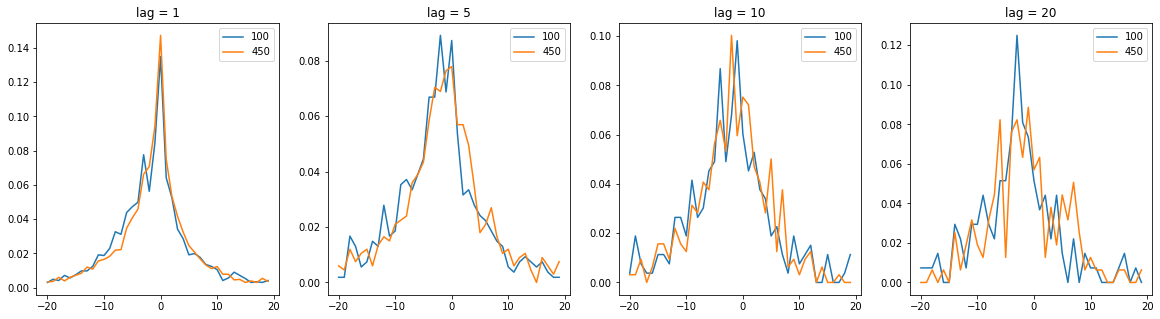

In [21]:
colors = {150:'blue',350:'red'}
fig,axs = plt.subplots(1,len(lags))
for lind,l in enumerate(lags):
    for partind,part in enumerate(part_inds):
        axs[lind].plot(binsies[:-1],res_tot[lind,:,partind],label = part)
        axs[lind].set_title(f'lag = {l}')
        axs[lind].legend()
plt.show()


In [13]:
res_P = np.zeros((len(part_inds),3,len(lags)))
dx = binsies[1]-binsies[0]
for lind,lag in enumerate(lags):
    for partind,part in enumerate(part_inds):
        res_P[partind,0,lind] = np.sum(res_tot[lind,:,partind][binsies[:-1]<0]*dx)
        res_P[partind,1,lind] = np.sum(res_tot[lind,:,partind][binsies[:-1]==0]*dx)
        res_P[partind,2,lind] = np.sum(res_tot[lind,:,partind][binsies[:-1]>0]*dx)

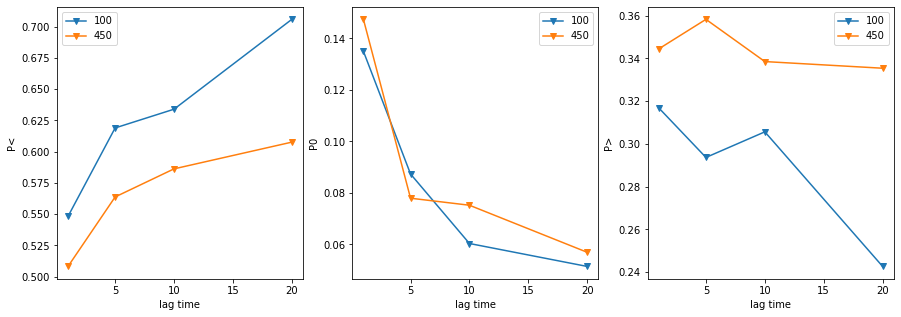

In [14]:
fig,axs = plt.subplots(1,3, figsize = (15,5))
y_labels = ['P<','P0','P>']
for i in range(3):
    for partind,part in enumerate(part_inds):
        axs[i].plot(lags,res_P[partind,i,:],marker = 'v',label = part)
        #axs[iprint(lind)].plot(lags,np.mean(res_P[:,i,:],axis = 0))
        axs[i].legend()
        axs[i].set_ylabel(y_labels[i])
        axs[i].set_xlabel('lag time')
plt.show()